# Importando variáveis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Anotações

- no maximo duas vezes o pinãho
- 4 molas ou mais
- 1 mm para soltar

# Embreagem

In [2]:
# constantes embragem

Pot = 7.5e3
w = 900 / 60 * 2 * np.pi
torque_proj = Pot / w 
f = 0.45
p_max = 2070e3
b = 3e-3
rho_emb = 7070
r_pinhao = 75
torque_proj


79.57747154594767

In [3]:
r_o_eval = np.linspace(10, r_pinhao, num=14, dtype=int )
r_i_list = []
r_o_list = []
N_list = []
P_list = []
F_emb_list = []
torque_list = []
Perim_list = []

for r_o_mm in r_o_eval:

    r_o = r_o_mm *1e-3

    # calculo de embreagem

    N = 2

    r_i = r_o * (1/3) ** 0.5

    torque = np.pi * p_max * f * r_i * (r_o**2 - r_i**2) * N

    while True:

        torque = np.pi * p_max * f * r_i * (r_o**2 - r_i**2) * N

        if (N > 14) or (torque > torque_proj):
            break
        
        N += 2


    if torque < torque_proj:
        torque_list.append(0)

    else: 
        torque_list.append(torque)

    F_emb = 2 * np.pi * p_max * r_i * (r_o - r_i)

    P = (np.pi * r_o ** 2 - np.pi * r_i ** 2) * b * rho_emb * (N * 2 - 1)

    r_i_list.append(r_i)
    r_o_list.append(r_o)
    N_list.append(N)
    P_list.append(P)
    F_emb_list.append(F_emb)
    Perim_list.append(2*np.pi*((r_o-r_i)/2 + r_i))

df_emb = pd.DataFrame(
    np.vstack((
        r_i_list, 
        r_o_list, 
        N_list,
        P_list, 
        F_emb_list,
        torque_list,
        Perim_list,
        )).T, 
        columns=["r_i", "r_o", "N","P","F","torque","Perim"]
)

df_emb = df_emb.drop(df_emb[df_emb.torque == 0].index.values)

df_emb

,r_i,r_o,N,P,F,torque,Perim
2,0.011547,0.020,10.0,0.337608,1269.492602,90.109552,0.099108
3,0.014434,0.025,6.0,0.305402,1983.582191,105.597132,0.123885
4,0.017321,0.030,4.0,0.279859,2856.358355,121.647896,0.148662
5,0.020207,0.035,2.0,0.163251,3887.821095,96.586176,0.173439
6,0.023094,0.040,2.0,0.213226,5077.970410,144.175284,0.198216
7,0.025981,0.045,2.0,0.269864,6426.806300,205.280824,0.222993
8,0.028868,0.050,2.0,0.333166,7934.328765,281.592351,0.247770
9,0.031754,0.055,2.0,0.403131,9600.537806,374.799420,0.272547
10,0.034641,0.060,2.0,0.479759,11425.433422,486.591583,0.297324
11,0.037528,0.065,2.0,0.563050,13409.015613,618.658396,0.322100


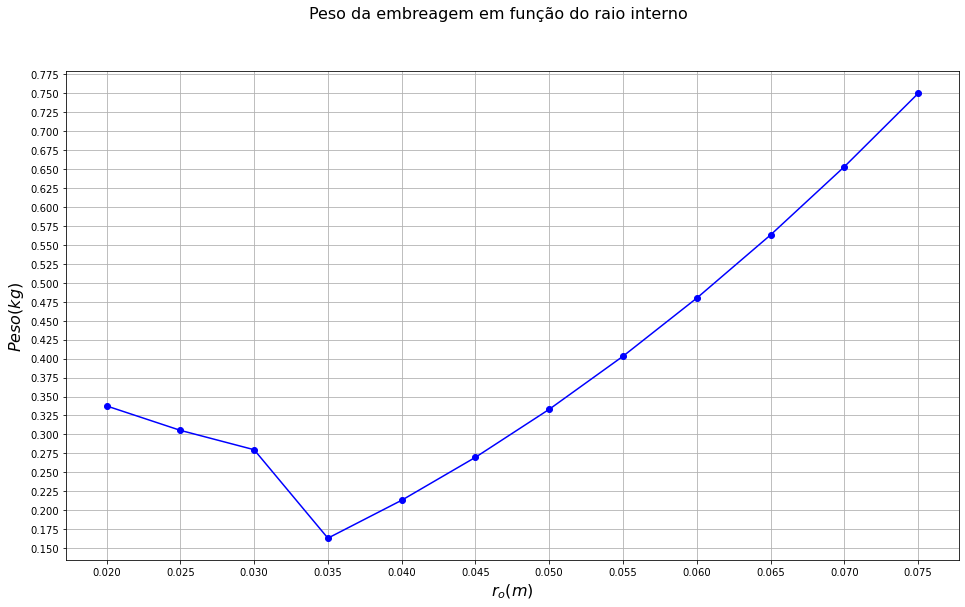

In [4]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Peso da embreagem em função do raio interno', fontsize=16)

ax = fig.add_subplot(1,1,1)

# Plotando 2D

ax.plot(df_emb.r_o,
    df_emb.P,
    'o', 
    df_emb.r_o, 
    df_emb.P, 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=20)
ax.set_ylabel('$Peso (kg)$', fontsize=16)
ax.set_xlabel('$r_o (gpm)$', fontsize=16)
ax.grid()

plt.show()

# Mola

In [19]:
# constantes
Su = 1250e6
Su_lim = 0.80
Su_vida_inf = 0.62
Sy_lim = 0.65
delta_p = 1e-3
G = 79e9
E = 207e9
rho = 7700

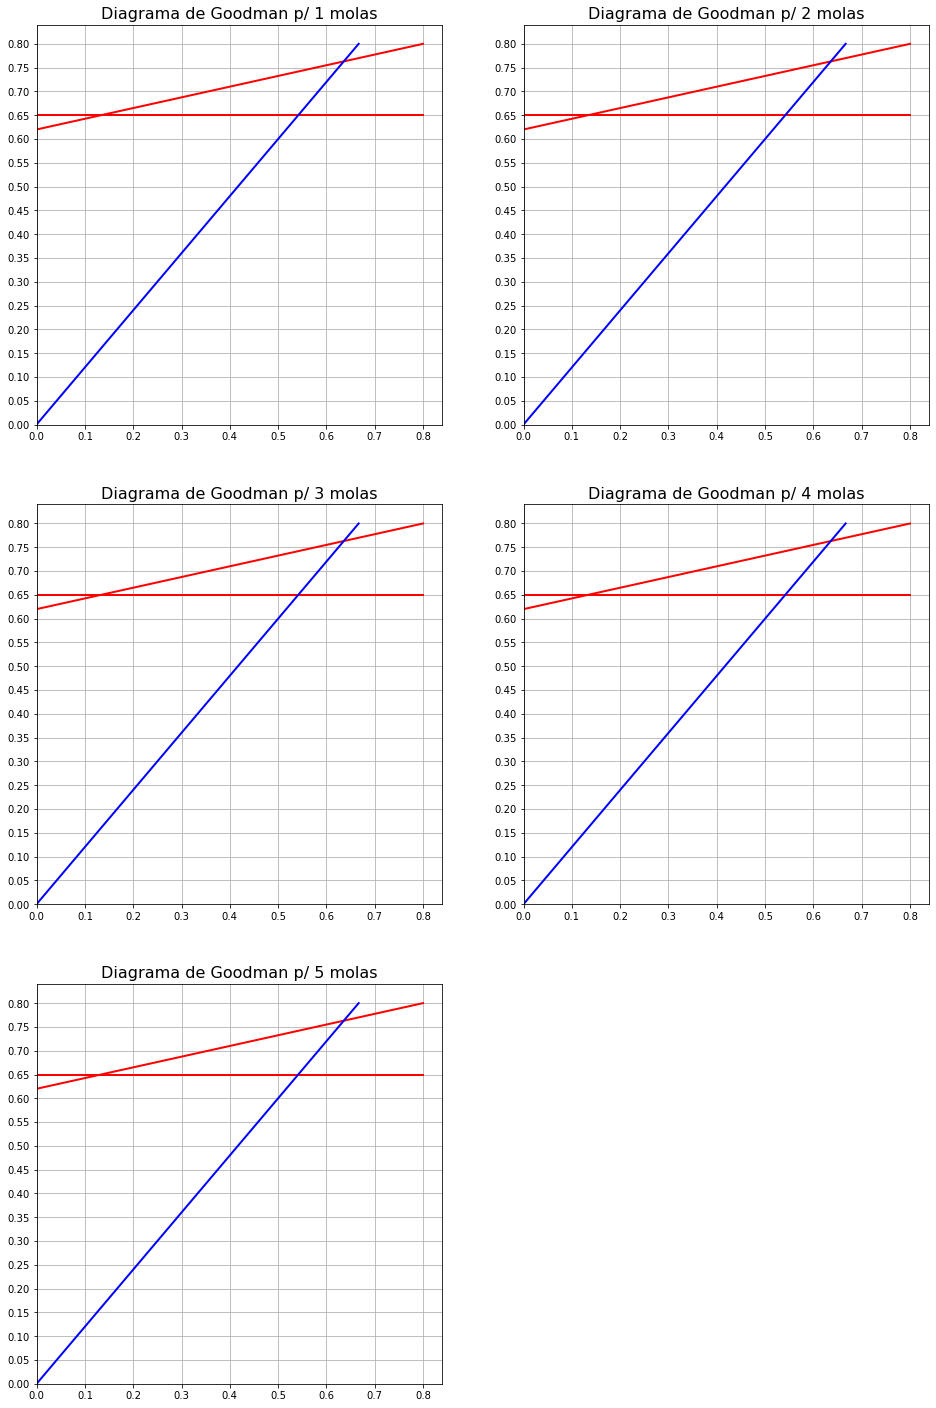

In [20]:
n_molas_list = np.linspace(8,4,num=5,dtype=int)

# plotagem diagrama de goodman

fig = plt.figure(figsize=[16, 25])

for i,n_molas in enumerate(n_molas_list):
    
    F_min = 1 / n_molas

    F_max = F_min * 1.2

    Fs = 1.1 * F_max

    linha_sobrecarga_1 = np.array(
        ([0,Su_vida_inf],
        [Su_lim,Su_lim])
    ) 

    linha_sobrecarga_2 = np.array(
        ([0,Sy_lim],
        [Su_lim,Sy_lim])
    ) 

    linha_carga = np.array(
        ([0,0],
        [Su_lim*(F_min/F_max),Su_lim])
    )


    # Plotando 2D

    ax = fig.add_subplot(3, 2, (i+1) )

    ax.set_title('Diagrama de Goodman p/ {} molas'.format(i+1), fontsize=16)

    ax.plot(linha_sobrecarga_1[:,0], linha_sobrecarga_1[:,1], 'r', linewidth=2)
    ax.plot(linha_sobrecarga_2[:,0], linha_sobrecarga_2[:,1], 'r', linewidth=2)
    ax.plot(linha_carga[:,0], linha_carga[:,1], 'b', linewidth=2)

    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.locator_params(axis='y', nbins=20)
    ax.grid()

plt.show()


In [21]:
# encontrando tensão limite

tensao_max_teorico = 0.65 * Su

f_seguranca = 0.1

f_mola_solida = 0.1

tensao_max = tensao_max_teorico/(1+f_seguranca)/(1+f_mola_solida)

print('{:.2e} MPa'.format(tensao_max/1e6))

6.71e+02 MPa


In [22]:
# estabelecendo um diãmetro alvo

C_t = 5

Kw = (4*C_t - 1)/(4*C_t - 4) + 0.615/C_t

d_alvo = (8*F_max*C_t*Kw/(np.pi*tensao_max))**0.5

print('{:.2e} mm'.format(d_alvo*1e3))

8.63e-02 mm


In [23]:
## converge C

def C_converge(C_t,d,tau,F_max,verbose=False):

    k = 0


    while True:
        
        k += 1

        Ks = (4*C_t - 1)/(4*C_t - 4) + 0.675/C_t

        C_p = tau*np.pi*d**2/(8*F_max*Ks)

        error = ((C_p-C_t)**2)**0.5

        C_t = (C_p+C_t)/2

        if verbose:
            print("C_t",C_t)
            print("C_p",C_p)
            print("error",error)
            print('*'*12)

        if error <= C_t*0.1:
            return C_t


        if k >= 200:
            return 0


In [24]:
from curses.ascii import LF


d_mm_list = np.linspace(1,10,num=10,dtype=float)

C_list = []
D_list = []
Nt_list = []
Lf_D_list = []
delta_Lf_list = []
V_list = []
P_list = []
fn_list = []
d_list = []
N_list = []
Diam_list = []
k_list = []
R_ex_list = []
r_o_list = []
L_min_list = []

for F_emb, r_i_emb, r_o_emb in zip(df_emb.F, df_emb.r_i, df_emb.r_o):
    for n_molas in n_molas_list:
        for i,d_mm in enumerate(d_mm_list):

            F_min = F_emb / n_molas

            F_max = F_min * 1.2

            Fs = 1.1 * F_max

            d = d_mm*1e-3

            k = (F_max-F_min)/delta_p

            C = C_converge(C_t,d,tensao_max,F_max)

            D = C * d

            N = d * G/(8 * C**3 * k)

            N_t = N + 2

            Ls = N_t * d

            delta_s = Fs/k

            L_f = Ls + delta_s

            Lf_D = L_f/D

            delta_Lf = delta_s/L_f

            V = (np.pi * d **2 / 4) * 2 * np.pi * D/2

            P += V * rho * n_molas

            fn = 353e3*d/(N*D**2) * 60

            Diam = D + d
            
            if Diam > (r_o_emb - r_i_emb):
                Diam_list.append(0)

            else: 
                Diam_list.append(Diam)
                
            Perim = n_molas * Diam

            R = Perim /(2 * np.pi)

            R_ex = R + ((d + D)/2)

            
            if R_ex > r_o_emb:
                R_ex_list.append(0)

            else: 
                R_ex_list.append(R_ex)

            C_list.append(C)
            D_list.append(D)
            Nt_list.append(N_t)
            Lf_D_list.append(Lf_D)
            delta_Lf_list.append(delta_Lf)
            V_list.append(V)
            P_list.append(P)
            fn_list.append(fn)
            d_list.append(d)
            N_list.append(n_molas)
            k_list.append(k)
            r_o_list.append(r_o_emb)
            L_min_list.append(L_f)

df = pd.DataFrame(np.vstack((
        d_list,
        C_list,
        N_list,
        Diam_list,
        R_ex_list,
        r_o_list,
        k_list,
        L_min_list,
        D_list,
        Nt_list,
        Lf_D_list,
        delta_Lf_list,
        P_list,
        fn_list,
    )).T,columns=[
            'd',
            'C',
            'n_molas',
            'Diam',
            'R_ex',
            'r_o_emb',
            'k',
            'L_carr',
            'D',
            'Nt',
            'Lf_D',
            'delta/Lf',
            'P',
            'fn',
        ], dtype=float)

df = df.drop(df[df.C == 0].index.values)
df = df.drop(df[df.R_ex == 0].index.values)
df = df.drop(df[df.Diam == 0].index.values)
df = df.drop(df[df.Lf_D > 7].index.values)

df


/tmp/ipykernel_9712/3680420355.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  N = d * G/(8 * C**3 * k)
/tmp/ipykernel_9712/3680420355.py:58: RuntimeWarning: invalid value encountered in double_scalars
  fn = 353e3*d/(N*D**2) * 60


,d,C,n_molas,Diam,R_ex,r_o_emb,k,L_carr,D,Nt,Lf_D,delta/Lf,P,fn
223,0.004,2.598977,6.0,0.014396,0.020945,0.040,169265.680319,0.067772,0.010396,15.292937,6.519080,0.097386,1549.822570,5.897123e+07
253,0.004,2.816269,8.0,0.015265,0.027069,0.045,160670.157490,0.058625,0.011265,13.006258,5.204141,0.112580,1561.976609,6.065661e+07
284,0.005,2.716010,5.0,0.018580,0.024076,0.045,257072.251984,0.064532,0.013580,11.586445,4.751987,0.102274,1580.730338,5.990119e+07
324,0.005,2.598977,6.0,0.017995,0.026181,0.050,264477.625498,0.069772,0.012995,12.634350,5.369170,0.094594,1596.908040,5.897123e+07
345,0.006,2.326437,4.0,0.019959,0.022685,0.050,396716.438247,0.089768,0.013959,13.861362,6.431021,0.073523,1602.749125,5.498671e+07
354,0.005,3.113119,8.0,0.020566,0.036468,0.055,240013.445139,0.050692,0.015566,8.818432,3.256680,0.130198,1604.191528,6.410326e+07
385,0.006,2.465072,5.0,0.020790,0.026940,0.055,384021.512223,0.080401,0.014790,12.300158,5.436011,0.082089,1616.117122,5.639902e+07
425,0.006,2.598977,6.0,0.021594,0.031418,0.060,380847.780717,0.071772,0.015594,10.861958,4.602564,0.091958,1626.520505,5.897123e+07
455,0.006,3.243078,8.0,0.025458,0.045144,0.065,335225.390319,0.049691,0.019458,7.181785,2.553681,0.132822,1631.165060,6.477100e+07
465,0.006,2.475285,7.0,0.020852,0.033656,0.065,383114.731793,0.079784,0.014852,12.197263,5.372012,0.082724,1634.636247,5.649897e+07


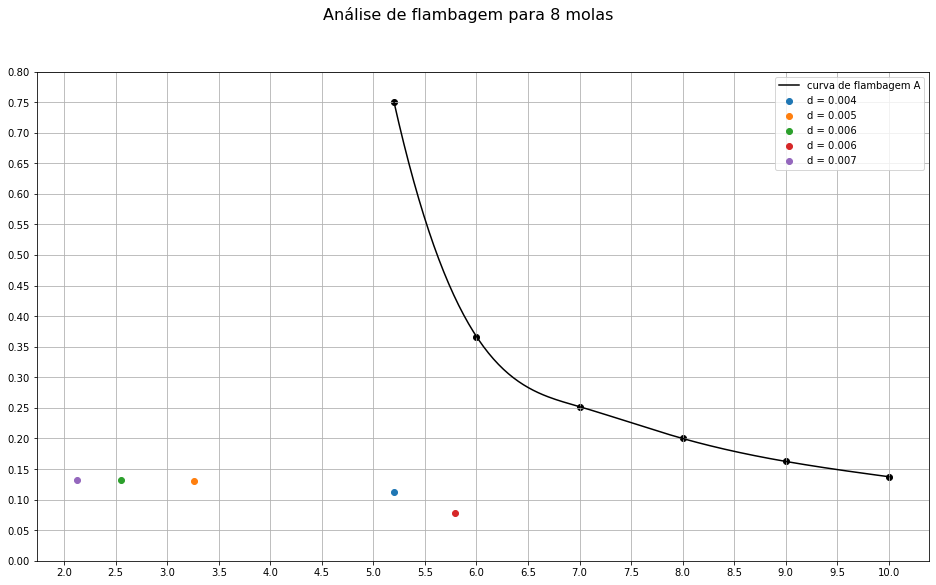

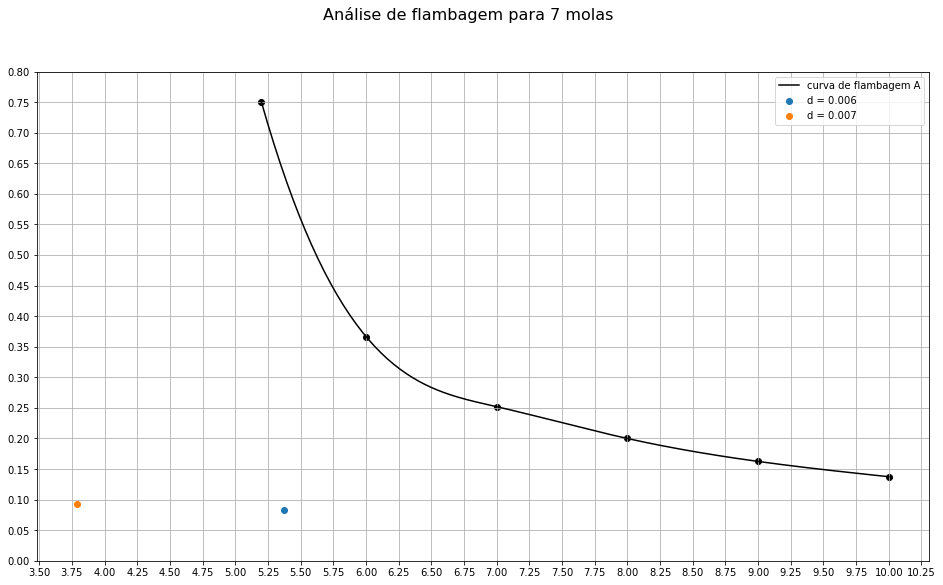

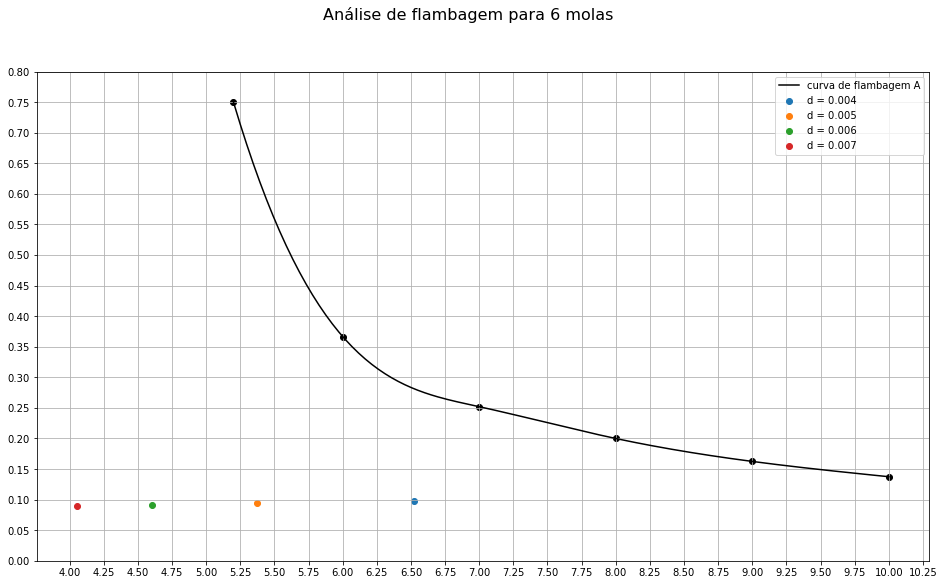

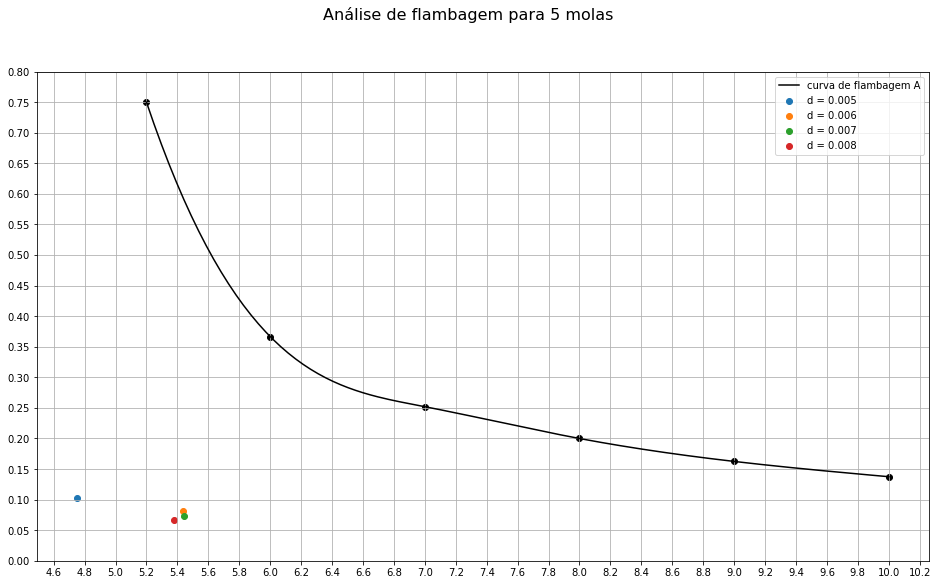

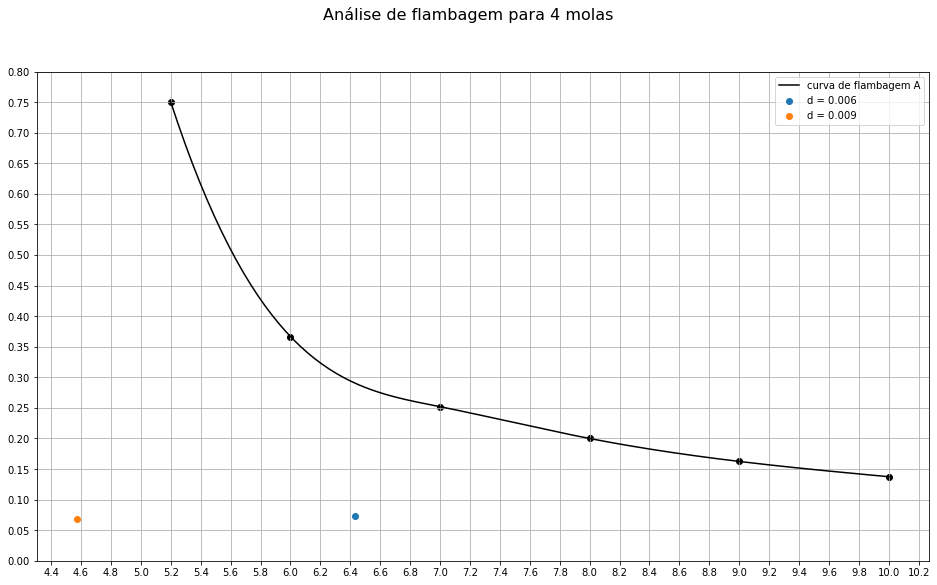

In [25]:
# Análise de flambagem

for n_molas in n_molas_list:
    fig = plt.figure(figsize=[16, 9])
    fig.suptitle('Análise de flambagem para {:d} molas'.format(n_molas), fontsize=16)

    flambagem_seed = np.array((
        [5.2,0.75],
        [10,0.1375],
        [9,0.1625],
        [6,0.3667],
        [8,0.2],
        [7,0.252]
    ))


    f2 = interp1d(
        flambagem_seed[:,0], 
        flambagem_seed[:,1],
        kind='cubic'
    )

    flambagem_eval = np.linspace(
        min(flambagem_seed[:,0]),
        max(flambagem_seed[:,0]),
        num=200
    )
    curva_A = f2(flambagem_eval)   # use interpolation function returned by `interp1d`


    ax = fig.add_subplot(1, 1, 1)


    ax.plot(
        flambagem_eval, 
        curva_A, 
        '-',
        color='k',
        label='curva de flambagem A'
    )

    ax.scatter(
        flambagem_seed[:,0], 
        flambagem_seed[:,1], 
        color='k', )

    df_selected = df.loc[df.n_molas == n_molas]

    for Lf_D, delta_Lf, d in zip(df_selected.Lf_D, df_selected['delta/Lf'], df_selected.d,):

        ax.scatter(
            Lf_D,
            delta_Lf, 
            label="d = {:.3f}".format(d))

    ax.set_ylim(0,0.8)
    ax.locator_params(axis='y', nbins=30)
    ax.locator_params(axis='x', nbins=30)
    ax.grid()
    ax.legend()

    plt.show()